# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I 
 
The obvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

1. [This blog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 

2. [This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


2680.042060172422


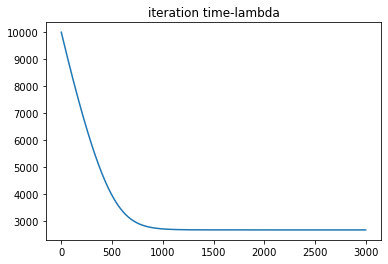

In [39]:
# Code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
learning_rate=0.1
num_iters=3000
data=pd.read_csv("nyc_bb_bicyclist_counts.csv")
n=data.shape[0]
# print(data)
bb_count=np.array(data['BB_COUNT'])
# print(bb_count)
lambda1=10000
iter_l=[]

for i in range(num_iters):
    lambda1 = lambda1-learning_rate*(n-bb_count.sum()/lambda1)
    iter_l.append(lambda1)
    
print(lambda1)
plt.plot(iter_l)
plt.title('iteration time-lambda')
plt.show()


## Maximum Likelihood II

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\lambda_i = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the predictions with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

In [62]:
# 
import random
data=pd.read_csv("nyc_bb_bicyclist_counts.csv")
n=data.shape[0]
y=np.array(data['BB_COUNT']).reshape((n,1))
hight=np.array(data['HIGH_T']).reshape((n,1))
lowt=np.array(data['LOW_T']).reshape((n,1))
precip=np.array(data['PRECIP']).reshape((n,1))
x=np.hstack((np.ones((n,1)),hight,lowt,precip))
# print(comb)


# a=np.array([1,2,3,4,5,6,7,8,9,10]).reshape((5,2))
# b=np.array([2,2,2,2,2]).reshape((5,1))
# print(a[0,:])
def gradient(x,y,w):
    predict=np.exp(x.dot(w))
#     print(predict)
    residual=y-predict
    temp=x*residual
    sume=np.array([0.0,0.0,0.0,0.0]).reshape((4,1))
    for i in range(x.shape[0]):
        sume+=temp[i,:].reshape((4,1))
    return sume


w=np.array([0.01,0.01,0.01,0.01]).reshape((4,1))
# print(w)
learning_rate=0.000001
num_iters=10000

# print(x.dot(w))

for i in range(num_iters):
    
    dw=gradient(x,y,w)
    w-=learning_rate*dw
    lambda1=np.exp(x.dot(w))

# plt.plot(iter_l)

[[-5.62668733e-01]
 [-4.34160433e+01]
 [-3.60080333e+01]
 [-2.42691507e-02]]
[[-1.13619773e+00]
 [-8.69075037e+01]
 [-7.20808410e+01]
 [-5.86460707e-02]]
[[-1.70972673e+00]
 [-1.30398964e+02]
 [-1.08153649e+02]
 [-9.30229907e-02]]
[[-2.28325573e+00]
 [-1.73890425e+02]
 [-1.44226456e+02]
 [-1.27399911e-01]]
[[-2.85678473e+00]
 [-2.17381885e+02]
 [-1.80299264e+02]
 [-1.61776831e-01]]
[[-3.43031373e+00]
 [-2.60873345e+02]
 [-2.16372072e+02]
 [-1.96153751e-01]]
[[-4.00384273e+00]
 [-3.04364806e+02]
 [-2.52444880e+02]
 [-2.30530671e-01]]
[[-4.57737173e+00]
 [-3.47856266e+02]
 [-2.88517687e+02]
 [-2.64907591e-01]]
[[-5.15090073e+00]
 [-3.91347727e+02]
 [-3.24590495e+02]
 [-2.99284511e-01]]
[[-5.72442973e+00]
 [-4.34839187e+02]
 [-3.60663303e+02]
 [-3.33661431e-01]]
[[-6.29795873e+00]
 [-4.78330647e+02]
 [-3.96736110e+02]
 [-3.68038351e-01]]
[[-6.87148773e+00]
 [-5.21822108e+02]
 [-4.32808918e+02]
 [-4.02415271e-01]]
[[-7.44501673e+00]
 [-5.65313568e+02]
 [-4.68881726e+02]
 [-4.36792191e-01]]

 [-1.77283830e+01]]
[[-2.96503633e+02]
 [-2.24850096e+04]
 [-1.86495768e+04]
 [-1.77627599e+01]]
[[-2.97077162e+02]
 [-2.25285011e+04]
 [-1.86856496e+04]
 [-1.77971368e+01]]
[[-2.97650691e+02]
 [-2.25719925e+04]
 [-1.87217224e+04]
 [-1.78315137e+01]]
[[-2.98224220e+02]
 [-2.26154840e+04]
 [-1.87577952e+04]
 [-1.78658906e+01]]
[[-2.98797749e+02]
 [-2.26589755e+04]
 [-1.87938680e+04]
 [-1.79002676e+01]]
[[-2.99371278e+02]
 [-2.27024669e+04]
 [-1.88299408e+04]
 [-1.79346445e+01]]
[[-2.99944807e+02]
 [-2.27459584e+04]
 [-1.88660137e+04]
 [-1.79690214e+01]]
[[-3.00518336e+02]
 [-2.27894498e+04]
 [-1.89020865e+04]
 [-1.80033983e+01]]
[[-3.01091865e+02]
 [-2.28329413e+04]
 [-1.89381593e+04]
 [-1.80377752e+01]]
[[-3.01665394e+02]
 [-2.28764328e+04]
 [-1.89742321e+04]
 [-1.80721522e+01]]
[[-3.02238923e+02]
 [-2.29199242e+04]
 [-1.90103049e+04]
 [-1.81065291e+01]]
[[-3.02812452e+02]
 [-2.29634157e+04]
 [-1.90463777e+04]
 [-1.81409060e+01]]
[[-3.03385981e+02]
 [-2.30069071e+04]
 [-1.90824505e+04]

[[-6.49223968e+02]
 [-4.92322578e+04]
 [-4.08343535e+04]
 [-3.89045657e+01]]
[[-6.49797497e+02]
 [-4.92757492e+04]
 [-4.08704263e+04]
 [-3.89389426e+01]]
[[-6.50371026e+02]
 [-4.93192407e+04]
 [-4.09064992e+04]
 [-3.89733195e+01]]
[[-6.50944555e+02]
 [-4.93627321e+04]
 [-4.09425720e+04]
 [-3.90076964e+01]]
[[-6.51518084e+02]
 [-4.94062236e+04]
 [-4.09786448e+04]
 [-3.90420734e+01]]
[[-6.52091613e+02]
 [-4.94497151e+04]
 [-4.10147176e+04]
 [-3.90764503e+01]]
[[-6.52665142e+02]
 [-4.94932065e+04]
 [-4.10507904e+04]
 [-3.91108272e+01]]
[[-6.53238671e+02]
 [-4.95366980e+04]
 [-4.10868632e+04]
 [-3.91452041e+01]]
[[-6.53812200e+02]
 [-4.95801894e+04]
 [-4.11229360e+04]
 [-3.91795810e+01]]
[[-6.54385729e+02]
 [-4.96236809e+04]
 [-4.11590088e+04]
 [-3.92139580e+01]]
[[-6.54959258e+02]
 [-4.96671724e+04]
 [-4.11950816e+04]
 [-3.92483349e+01]]
[[-6.55532787e+02]
 [-4.97106638e+04]
 [-4.12311544e+04]
 [-3.92827118e+01]]
[[-6.56106316e+02]
 [-4.97541553e+04]
 [-4.12672272e+04]
 [-3.93170887e+01]]

 [-5.94275869e+01]]
[[-9.92194310e+02]
 [-7.52401511e+04]
 [-6.24058925e+04]
 [-5.94619638e+01]]
[[-9.92767839e+02]
 [-7.52836425e+04]
 [-6.24419654e+04]
 [-5.94963408e+01]]
[[-9.93341368e+02]
 [-7.53271340e+04]
 [-6.24780382e+04]
 [-5.95307177e+01]]
[[-9.93914897e+02]
 [-7.53706255e+04]
 [-6.25141110e+04]
 [-5.95650946e+01]]
[[-9.94488426e+02]
 [-7.54141169e+04]
 [-6.25501838e+04]
 [-5.95994715e+01]]
[[-9.95061955e+02]
 [-7.54576084e+04]
 [-6.25862566e+04]
 [-5.96338484e+01]]
[[-9.95635484e+02]
 [-7.55010998e+04]
 [-6.26223294e+04]
 [-5.96682254e+01]]
[[-9.96209013e+02]
 [-7.55445913e+04]
 [-6.26584022e+04]
 [-5.97026023e+01]]
[[-9.96782542e+02]
 [-7.55880828e+04]
 [-6.26944750e+04]
 [-5.97369792e+01]]
[[-9.97356071e+02]
 [-7.56315742e+04]
 [-6.27305478e+04]
 [-5.97713561e+01]]
[[-9.97929600e+02]
 [-7.56750657e+04]
 [-6.27666206e+04]
 [-5.98057330e+01]]
[[-9.98503129e+02]
 [-7.57185571e+04]
 [-6.28026934e+04]
 [-5.98401100e+01]]
[[-9.99076658e+02]
 [-7.57620486e+04]
 [-6.28387662e+04]

 [-7.76473545e+01]]
[[-1.29616468e+03]
 [-9.82906251e+04]
 [-8.15244806e+04]
 [-7.76817314e+01]]
[[-1.29673821e+03]
 [-9.83341165e+04]
 [-8.15605534e+04]
 [-7.77161084e+01]]
[[-1.29731174e+03]
 [-9.83776080e+04]
 [-8.15966262e+04]
 [-7.77504853e+01]]
[[-1.29788527e+03]
 [-9.84210995e+04]
 [-8.16326991e+04]
 [-7.77848622e+01]]
[[-1.29845880e+03]
 [-9.84645909e+04]
 [-8.16687719e+04]
 [-7.78192391e+01]]
[[-1.29903232e+03]
 [-9.85080824e+04]
 [-8.17048447e+04]
 [-7.78536160e+01]]
[[-1.29960585e+03]
 [-9.85515738e+04]
 [-8.17409175e+04]
 [-7.78879930e+01]]
[[-1.30017938e+03]
 [-9.85950653e+04]
 [-8.17769903e+04]
 [-7.79223699e+01]]
[[-1.30075291e+03]
 [-9.86385568e+04]
 [-8.18130631e+04]
 [-7.79567468e+01]]
[[-1.30132644e+03]
 [-9.86820482e+04]
 [-8.18491359e+04]
 [-7.79911237e+01]]
[[-1.30189997e+03]
 [-9.87255397e+04]
 [-8.18852087e+04]
 [-7.80255006e+01]]
[[-1.30247350e+03]
 [-9.87690312e+04]
 [-8.19212815e+04]
 [-7.80598776e+01]]
[[-1.30304703e+03]
 [-9.88125226e+04]
 [-8.19573543e+04]

 [-9.83422604e+01]]
[[-1.64142914e+03]
 [-1.24472484e+05]
 [-1.03240311e+05]
 [-9.83766373e+01]]
[[-1.64200267e+03]
 [-1.24515976e+05]
 [-1.03276384e+05]
 [-9.84110142e+01]]
[[-1.64257620e+03]
 [-1.24559467e+05]
 [-1.03312456e+05]
 [-9.84453911e+01]]
[[-1.64314972e+03]
 [-1.24602959e+05]
 [-1.03348529e+05]
 [-9.84797680e+01]]
[[-1.64372325e+03]
 [-1.24646450e+05]
 [-1.03384602e+05]
 [-9.85141450e+01]]
[[-1.64429678e+03]
 [-1.24689942e+05]
 [-1.03420675e+05]
 [-9.85485219e+01]]
[[-1.64487031e+03]
 [-1.24733433e+05]
 [-1.03456748e+05]
 [-9.85828988e+01]]
[[-1.64544384e+03]
 [-1.24776924e+05]
 [-1.03492821e+05]
 [-9.86172757e+01]]
[[-1.64601737e+03]
 [-1.24820416e+05]
 [-1.03528893e+05]
 [-9.86516526e+01]]
[[-1.64659090e+03]
 [-1.24863907e+05]
 [-1.03564966e+05]
 [-9.86860296e+01]]
[[-1.64716443e+03]
 [-1.24907399e+05]
 [-1.03601039e+05]
 [-9.87204065e+01]]
[[-1.64773796e+03]
 [-1.24950890e+05]
 [-1.03637112e+05]
 [-9.87547834e+01]]
[[-1.64831149e+03]
 [-1.24994382e+05]
 [-1.03673185e+05]

 [-1.17490205e+02]]
[[-1.96088479e+03]
 [-1.48697228e+05]
 [-1.23332865e+05]
 [-1.17524582e+02]]
[[-1.96145832e+03]
 [-1.48740719e+05]
 [-1.23368938e+05]
 [-1.17558959e+02]]
[[-1.96203185e+03]
 [-1.48784211e+05]
 [-1.23405010e+05]
 [-1.17593336e+02]]
[[-1.96260538e+03]
 [-1.48827702e+05]
 [-1.23441083e+05]
 [-1.17627712e+02]]
[[-1.96317891e+03]
 [-1.48871194e+05]
 [-1.23477156e+05]
 [-1.17662089e+02]]
[[-1.96375244e+03]
 [-1.48914685e+05]
 [-1.23513229e+05]
 [-1.17696466e+02]]
[[-1.96432596e+03]
 [-1.48958176e+05]
 [-1.23549302e+05]
 [-1.17730843e+02]]
[[-1.96489949e+03]
 [-1.49001668e+05]
 [-1.23585374e+05]
 [-1.17765220e+02]]
[[-1.96547302e+03]
 [-1.49045159e+05]
 [-1.23621447e+05]
 [-1.17799597e+02]]
[[-1.96604655e+03]
 [-1.49088651e+05]
 [-1.23657520e+05]
 [-1.17833974e+02]]
[[-1.96662008e+03]
 [-1.49132142e+05]
 [-1.23693593e+05]
 [-1.17868351e+02]]
[[-1.96719361e+03]
 [-1.49175634e+05]
 [-1.23729666e+05]
 [-1.17902728e+02]]
[[-1.96776714e+03]
 [-1.49219125e+05]
 [-1.23765738e+05]

[[-2.29639926e+03]
 [-1.74139732e+05]
 [-1.44435457e+05]
 [-1.37635080e+02]]
[[-2.29697278e+03]
 [-1.74183223e+05]
 [-1.44471530e+05]
 [-1.37669457e+02]]
[[-2.29754631e+03]
 [-1.74226715e+05]
 [-1.44507603e+05]
 [-1.37703834e+02]]
[[-2.29811984e+03]
 [-1.74270206e+05]
 [-1.44543676e+05]
 [-1.37738211e+02]]
[[-2.29869337e+03]
 [-1.74313698e+05]
 [-1.44579748e+05]
 [-1.37772588e+02]]
[[-2.29926690e+03]
 [-1.74357189e+05]
 [-1.44615821e+05]
 [-1.37806965e+02]]
[[-2.29984043e+03]
 [-1.74400681e+05]
 [-1.44651894e+05]
 [-1.37841341e+02]]
[[-2.30041396e+03]
 [-1.74444172e+05]
 [-1.44687967e+05]
 [-1.37875718e+02]]
[[-2.30098749e+03]
 [-1.74487664e+05]
 [-1.44724040e+05]
 [-1.37910095e+02]]
[[-2.30156102e+03]
 [-1.74531155e+05]
 [-1.44760113e+05]
 [-1.37944472e+02]]
[[-2.30213455e+03]
 [-1.74574647e+05]
 [-1.44796185e+05]
 [-1.37978849e+02]]
[[-2.30270807e+03]
 [-1.74618138e+05]
 [-1.44832258e+05]
 [-1.38013226e+02]]
[[-2.30328160e+03]
 [-1.74661630e+05]
 [-1.44868331e+05]
 [-1.38047603e+02]]

[[-2.60667844e+03]
 [-1.97668612e+05]
 [-1.63950846e+05]
 [-1.56232994e+02]]
[[-2.60725197e+03]
 [-1.97712104e+05]
 [-1.63986919e+05]
 [-1.56267371e+02]]
[[-2.60782550e+03]
 [-1.97755595e+05]
 [-1.64022992e+05]
 [-1.56301747e+02]]
[[-2.60839903e+03]
 [-1.97799086e+05]
 [-1.64059065e+05]
 [-1.56336124e+02]]
[[-2.60897256e+03]
 [-1.97842578e+05]
 [-1.64095137e+05]
 [-1.56370501e+02]]
[[-2.60954609e+03]
 [-1.97886069e+05]
 [-1.64131210e+05]
 [-1.56404878e+02]]
[[-2.61011962e+03]
 [-1.97929561e+05]
 [-1.64167283e+05]
 [-1.56439255e+02]]
[[-2.61069315e+03]
 [-1.97973052e+05]
 [-1.64203356e+05]
 [-1.56473632e+02]]
[[-2.61126668e+03]
 [-1.98016544e+05]
 [-1.64239429e+05]
 [-1.56508009e+02]]
[[-2.61184021e+03]
 [-1.98060035e+05]
 [-1.64275501e+05]
 [-1.56542386e+02]]
[[-2.61241373e+03]
 [-1.98103527e+05]
 [-1.64311574e+05]
 [-1.56576763e+02]]
[[-2.61298726e+03]
 [-1.98147018e+05]
 [-1.64347647e+05]
 [-1.56611140e+02]]
[[-2.61356079e+03]
 [-1.98190510e+05]
 [-1.64383720e+05]
 [-1.56645517e+02]]

[[-2.95710466e+03]
 [-2.24241894e+05]
 [-1.85991332e+05]
 [-1.77237292e+02]]
[[-2.95767819e+03]
 [-2.24285386e+05]
 [-1.86027405e+05]
 [-1.77271669e+02]]
[[-2.95825172e+03]
 [-2.24328877e+05]
 [-1.86063477e+05]
 [-1.77306046e+02]]
[[-2.95882525e+03]
 [-2.24372369e+05]
 [-1.86099550e+05]
 [-1.77340423e+02]]
[[-2.95939878e+03]
 [-2.24415860e+05]
 [-1.86135623e+05]
 [-1.77374799e+02]]
[[-2.95997231e+03]
 [-2.24459352e+05]
 [-1.86171696e+05]
 [-1.77409176e+02]]
[[-2.96054584e+03]
 [-2.24502843e+05]
 [-1.86207769e+05]
 [-1.77443553e+02]]
[[-2.96111937e+03]
 [-2.24546335e+05]
 [-1.86243841e+05]
 [-1.77477930e+02]]
[[-2.96169290e+03]
 [-2.24589826e+05]
 [-1.86279914e+05]
 [-1.77512307e+02]]
[[-2.96226642e+03]
 [-2.24633318e+05]
 [-1.86315987e+05]
 [-1.77546684e+02]]
[[-2.96283995e+03]
 [-2.24676809e+05]
 [-1.86352060e+05]
 [-1.77581061e+02]]
[[-2.96341348e+03]
 [-2.24720300e+05]
 [-1.86388133e+05]
 [-1.77615438e+02]]
[[-2.96398701e+03]
 [-2.24763792e+05]
 [-1.86424205e+05]
 [-1.77649815e+02]]

[[-3.32416322e+03]
 [-2.52076429e+05]
 [-2.09077929e+05]
 [-1.99238521e+02]]
[[-3.32473675e+03]
 [-2.52119921e+05]
 [-2.09114001e+05]
 [-1.99272897e+02]]
[[-3.32531028e+03]
 [-2.52163412e+05]
 [-2.09150074e+05]
 [-1.99307274e+02]]
[[-3.32588381e+03]
 [-2.52206903e+05]
 [-2.09186147e+05]
 [-1.99341651e+02]]
[[-3.32645734e+03]
 [-2.52250395e+05]
 [-2.09222220e+05]
 [-1.99376028e+02]]
[[-3.32703087e+03]
 [-2.52293886e+05]
 [-2.09258293e+05]
 [-1.99410405e+02]]
[[-3.32760440e+03]
 [-2.52337378e+05]
 [-2.09294366e+05]
 [-1.99444782e+02]]
[[-3.32817793e+03]
 [-2.52380869e+05]
 [-2.09330438e+05]
 [-1.99479159e+02]]
[[-3.32875146e+03]
 [-2.52424361e+05]
 [-2.09366511e+05]
 [-1.99513536e+02]]
[[-3.32932498e+03]
 [-2.52467852e+05]
 [-2.09402584e+05]
 [-1.99547913e+02]]
[[-3.32989851e+03]
 [-2.52511344e+05]
 [-2.09438657e+05]
 [-1.99582290e+02]]
[[-3.33047204e+03]
 [-2.52554835e+05]
 [-2.09474730e+05]
 [-1.99616667e+02]]
[[-3.33104557e+03]
 [-2.52598327e+05]
 [-2.09510802e+05]
 [-1.99651044e+02]]

[[-3.67975120e+03]
 [-2.79041135e+05]
 [-2.31443069e+05]
 [-2.20552211e+02]]
[[-3.68032473e+03]
 [-2.79084626e+05]
 [-2.31479142e+05]
 [-2.20586588e+02]]
[[-3.68089826e+03]
 [-2.79128117e+05]
 [-2.31515215e+05]
 [-2.20620965e+02]]
[[-3.68147179e+03]
 [-2.79171609e+05]
 [-2.31551288e+05]
 [-2.20655342e+02]]
[[-3.68204532e+03]
 [-2.79215100e+05]
 [-2.31587361e+05]
 [-2.20689719e+02]]
[[-3.68261885e+03]
 [-2.79258592e+05]
 [-2.31623433e+05]
 [-2.20724096e+02]]
[[-3.68319238e+03]
 [-2.79302083e+05]
 [-2.31659506e+05]
 [-2.20758472e+02]]
[[-3.68376591e+03]
 [-2.79345575e+05]
 [-2.31695579e+05]
 [-2.20792849e+02]]
[[-3.68433944e+03]
 [-2.79389066e+05]
 [-2.31731652e+05]
 [-2.20827226e+02]]
[[-3.68491296e+03]
 [-2.79432558e+05]
 [-2.31767725e+05]
 [-2.20861603e+02]]
[[-3.68548649e+03]
 [-2.79476049e+05]
 [-2.31803798e+05]
 [-2.20895980e+02]]
[[-3.68606002e+03]
 [-2.79519541e+05]
 [-2.31839870e+05]
 [-2.20930357e+02]]
[[-3.68663355e+03]
 [-2.79563032e+05]
 [-2.31875943e+05]
 [-2.20964734e+02]]

 [-2.41384624e+02]]
[[-4.02788331e+03]
 [-3.05440451e+05]
 [-2.53339264e+05]
 [-2.41419001e+02]]
[[-4.02845684e+03]
 [-3.05483942e+05]
 [-2.53375337e+05]
 [-2.41453378e+02]]
[[-4.02903036e+03]
 [-3.05527434e+05]
 [-2.53411409e+05]
 [-2.41487755e+02]]
[[-4.02960389e+03]
 [-3.05570925e+05]
 [-2.53447482e+05]
 [-2.41522132e+02]]
[[-4.03017742e+03]
 [-3.05614417e+05]
 [-2.53483555e+05]
 [-2.41556509e+02]]
[[-4.03075095e+03]
 [-3.05657908e+05]
 [-2.53519628e+05]
 [-2.41590886e+02]]
[[-4.03132448e+03]
 [-3.05701400e+05]
 [-2.53555701e+05]
 [-2.41625263e+02]]
[[-4.03189801e+03]
 [-3.05744891e+05]
 [-2.53591773e+05]
 [-2.41659640e+02]]
[[-4.03247154e+03]
 [-3.05788383e+05]
 [-2.53627846e+05]
 [-2.41694017e+02]]
[[-4.03304507e+03]
 [-3.05831874e+05]
 [-2.53663919e+05]
 [-2.41728394e+02]]
[[-4.03361860e+03]
 [-3.05875366e+05]
 [-2.53699992e+05]
 [-2.41762771e+02]]
[[-4.03419213e+03]
 [-3.05918857e+05]
 [-2.53736065e+05]
 [-2.41797148e+02]]
[[-4.03476565e+03]
 [-3.05962348e+05]
 [-2.53772137e+05]

[[-4.40526539e+03]
 [-3.34057832e+05]
 [-2.77075171e+05]
 [-2.64039015e+02]]
[[-4.40583892e+03]
 [-3.34101323e+05]
 [-2.77111244e+05]
 [-2.64073392e+02]]
[[-4.40641245e+03]
 [-3.34144815e+05]
 [-2.77147317e+05]
 [-2.64107769e+02]]
[[-4.40698598e+03]
 [-3.34188306e+05]
 [-2.77183390e+05]
 [-2.64142146e+02]]
[[-4.40755950e+03]
 [-3.34231798e+05]
 [-2.77219462e+05]
 [-2.64176522e+02]]
[[-4.40813303e+03]
 [-3.34275289e+05]
 [-2.77255535e+05]
 [-2.64210899e+02]]
[[-4.40870656e+03]
 [-3.34318781e+05]
 [-2.77291608e+05]
 [-2.64245276e+02]]
[[-4.40928009e+03]
 [-3.34362272e+05]
 [-2.77327681e+05]
 [-2.64279653e+02]]
[[-4.40985362e+03]
 [-3.34405764e+05]
 [-2.77363754e+05]
 [-2.64314030e+02]]
[[-4.41042715e+03]
 [-3.34449255e+05]
 [-2.77399826e+05]
 [-2.64348407e+02]]
[[-4.41100068e+03]
 [-3.34492747e+05]
 [-2.77435899e+05]
 [-2.64382784e+02]]
[[-4.41157421e+03]
 [-3.34536238e+05]
 [-2.77471972e+05]
 [-2.64417161e+02]]
[[-4.41214774e+03]
 [-3.34579729e+05]
 [-2.77508045e+05]
 [-2.64451538e+02]]

 [-2.84390151e+02]]
[[-4.74536809e+03]
 [-3.59848268e+05]
 [-2.98466346e+05]
 [-2.84424528e+02]]
[[-4.74594161e+03]
 [-3.59891759e+05]
 [-2.98502419e+05]
 [-2.84458905e+02]]
[[-4.74651514e+03]
 [-3.59935251e+05]
 [-2.98538492e+05]
 [-2.84493282e+02]]
[[-4.74708867e+03]
 [-3.59978742e+05]
 [-2.98574565e+05]
 [-2.84527659e+02]]
[[-4.74766220e+03]
 [-3.60022234e+05]
 [-2.98610637e+05]
 [-2.84562036e+02]]
[[-4.74823573e+03]
 [-3.60065725e+05]
 [-2.98646710e+05]
 [-2.84596413e+02]]
[[-4.74880926e+03]
 [-3.60109217e+05]
 [-2.98682783e+05]
 [-2.84630790e+02]]
[[-4.74938279e+03]
 [-3.60152708e+05]
 [-2.98718856e+05]
 [-2.84665167e+02]]
[[-4.74995632e+03]
 [-3.60196200e+05]
 [-2.98754929e+05]
 [-2.84699544e+02]]
[[-4.75052985e+03]
 [-3.60239691e+05]
 [-2.98791001e+05]
 [-2.84733921e+02]]
[[-4.75110338e+03]
 [-3.60283183e+05]
 [-2.98827074e+05]
 [-2.84768298e+02]]
[[-4.75167690e+03]
 [-3.60326674e+05]
 [-2.98863147e+05]
 [-2.84802674e+02]]
[[-4.75225043e+03]
 [-3.60370165e+05]
 [-2.98899220e+05]

 [-3.06116365e+02]]
[[-5.10783841e+03]
 [-3.87334871e+05]
 [-3.21264361e+05]
 [-3.06150742e+02]]
[[-5.10841194e+03]
 [-3.87378362e+05]
 [-3.21300433e+05]
 [-3.06185119e+02]]
[[-5.10898547e+03]
 [-3.87421854e+05]
 [-3.21336506e+05]
 [-3.06219496e+02]]
[[-5.10955900e+03]
 [-3.87465345e+05]
 [-3.21372579e+05]
 [-3.06253873e+02]]
[[-5.11013253e+03]
 [-3.87508837e+05]
 [-3.21408652e+05]
 [-3.06288249e+02]]
[[-5.11070606e+03]
 [-3.87552328e+05]
 [-3.21444725e+05]
 [-3.06322626e+02]]
[[-5.11127959e+03]
 [-3.87595820e+05]
 [-3.21480797e+05]
 [-3.06357003e+02]]
[[-5.11185312e+03]
 [-3.87639311e+05]
 [-3.21516870e+05]
 [-3.06391380e+02]]
[[-5.11242665e+03]
 [-3.87682803e+05]
 [-3.21552943e+05]
 [-3.06425757e+02]]
[[-5.11300017e+03]
 [-3.87726294e+05]
 [-3.21589016e+05]
 [-3.06460134e+02]]
[[-5.11357370e+03]
 [-3.87769786e+05]
 [-3.21625089e+05]
 [-3.06494511e+02]]
[[-5.11414723e+03]
 [-3.87813277e+05]
 [-3.21661161e+05]
 [-3.06528888e+02]]
[[-5.11472076e+03]
 [-3.87856768e+05]
 [-3.21697234e+05]

[[-5.46457345e+03]
 [-4.14386559e+05]
 [-3.43701647e+05]
 [-3.27533186e+02]]
[[-5.46514698e+03]
 [-4.14430051e+05]
 [-3.43737720e+05]
 [-3.27567563e+02]]
[[-5.46572051e+03]
 [-4.14473542e+05]
 [-3.43773793e+05]
 [-3.27601940e+02]]
[[-5.46629404e+03]
 [-4.14517034e+05]
 [-3.43809865e+05]
 [-3.27636317e+02]]
[[-5.46686757e+03]
 [-4.14560525e+05]
 [-3.43845938e+05]
 [-3.27670694e+02]]
[[-5.46744110e+03]
 [-4.14604017e+05]
 [-3.43882011e+05]
 [-3.27705071e+02]]
[[-5.46801463e+03]
 [-4.14647508e+05]
 [-3.43918084e+05]
 [-3.27739448e+02]]
[[-5.46858815e+03]
 [-4.14690999e+05]
 [-3.43954157e+05]
 [-3.27773824e+02]]
[[-5.46916168e+03]
 [-4.14734491e+05]
 [-3.43990229e+05]
 [-3.27808201e+02]]
[[-5.46973521e+03]
 [-4.14777982e+05]
 [-3.44026302e+05]
 [-3.27842578e+02]]
[[-5.47030874e+03]
 [-4.14821474e+05]
 [-3.44062375e+05]
 [-3.27876955e+02]]
[[-5.47088227e+03]
 [-4.14864965e+05]
 [-3.44098448e+05]
 [-3.27911332e+02]]
[[-5.47145580e+03]
 [-4.14908457e+05]
 [-3.44134521e+05]
 [-3.27945709e+02]]